# Tensorflow 1

## Se quiser descomentar e rodar, selecione as linhas comentadas e tecle: 'ctrl' e ';'

In [ ]:
# import tensorflow.compat.v1 as tf
# tf.disable_v2_behavior()
# msg = tf.constant('Hello, TensorFlow!')
# sess = tf.Session()
# print(sess.run(msg).decode("utf-8"))

## Multiplicação de dois tensores

In [42]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np

a = tf.constant([ [1.0, 2.0], [3.0, 4.0] ])
b = tf.constant([ [5.0, 6.0], [7.0, 8.0] ])
c = tf.matmul(a,b)

sess = tf.Session()
print(sess.run(c))


[[19. 22.]
 [43. 50.]]


Cria o tensor 'a', mas, sem valores, só com o placeholder.
<br />Ao 'b' é atribuído o resultado da multiplicação de 'a' com ele mesmo.

In [44]:
a = tf.compat.v1.placeholder(tf.compat.v1.float32 , shape=(4,4))
b = tf.compat.v1.matmul(a, a)
rand_array = np.random.rand(4,4)
sess = tf.Session()
result = sess.run(b, feed_dict={a: rand_array})
print(result)

[[0.6605053  0.78586525 0.6841226  0.8508027 ]
 [0.67565554 1.3834592  0.5615863  0.7320034 ]
 [0.6390008  0.74685884 0.9814713  0.8939446 ]
 [0.29330546 0.25567386 0.39072847 0.43933368]]


# Plotando os dados

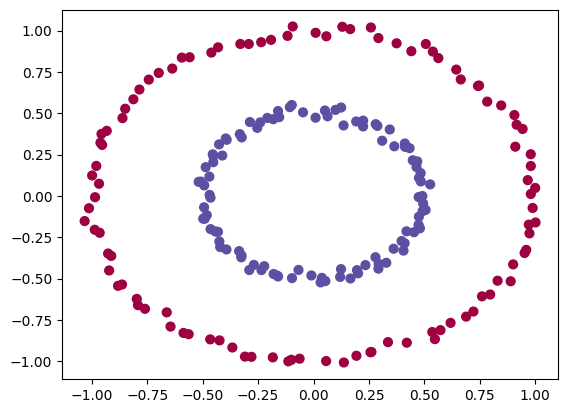

In [66]:
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn.datasets

#Setando o seed para gerar sempre a mesma coisa
tf.compat.v1.set_random_seed(2)
np.random.seed(2)

#gerando o dataset
dataset_X , dataset_Y = sklearn.datasets.make_circles(n_samples=200, shuffle=True, noise=0.02, random_state=90, factor=0.5)
#plotando o dataset
plt.scatter(dataset_X[:,0], dataset_X[:,1], s=40, c=dataset_Y, cmap=plt.cm.Spectral)

# Função que constroi a rede neural

A função **build_net()** recebe como parâmetro a quantidade de features e classes usadas
no problema, neste caso, tanto a quantidade de features quanto a de classes são
iguais a 2.

In [131]:
def build_net(n_features , n_classes):
  # Placeholders
  # shape=[None] indica que o batch pode ser de qualquer tamanho
  X_placeholder = tf.compat.v1.placeholder(dtype=tf.float32 , shape=[None , n_features])
  Y_placeholder = tf.compat.v1.placeholder(dtype=tf.int64 , shape=[None])
  # X_placeholder é camada de entrada da rede
  # Y_placeholder é o vetor que contém os labels do dataset
  # eles serão utilizados para comparação com a saída da rede.

  #camada oculta
  #O segundo argumento (100) é o número de neurônios / nós da camada.
  layer1 = tf.keras.layers.Dense(100, activation='relu')(X_placeholder)
  # relu é a função não linear, para que a rede não fique travada
  # ao tentar realizar a regressão linear em um problema não linear

  #camada de saída
  out = tf.keras.layers.Dense(n_classes, name="output")(layer1)

  #adaptando o vetor Y para o modelo One−Hot Label
  one_hot = tf.one_hot(Y_placeholder , depth=n_classes)
  # O vetor de labels, o Y_placeholder, é convertido para o formato OneHot
  # (por exemplo,  a label 0 se torna o vetor [1,0] e o label 1 se torna
  # o vetor [0,1]), dessa forma é possível a comparação com a saída da rede.

  #função de perda/custo/erro
  loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=one_hot, logits=out))
  # a função Entropia Cruzada é usada em conjunto com uma camada softmax
  # logits são os valores a serem usados ​​como entrada para softmax
  # Logit é uma função que mapeia probabilidades [0, 1]para [-inf, +inf].
  # Softmax é uma função que mapeia [-inf, +inf] para [0, 1] semelhante à sigmóide.
  # Estamos aplicando a função softmax aos números logit para normalizá-los.

  #otimizador
  opt = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.07).minimize(loss)
  # quanto menor o learning_rate mais demorado

  #classe do exemplo
  softmax = tf.nn.softmax(out)
  # Retorna um tensor, tem o mesmo tipo e formato dos logits (out), ele apenas
  # normaliza os valores.
  # As saídas do softmax podem ser interpretadas como probabilidades.
  # Levanta um InvalidArgumentError se os logits estiverem vazios ou
  # o eixo estiver além da última dimensão dos logits.


  class_ = tf.argmax(softmax, axis=1)
  # tensores que classificam um exemplo de entrada da rede
  # argmax retorna o índice com o maior valor entre os eixos de um tensor
  # axis: 0 significa coluna por coluna, 1 significa linha por linha

  # Acurácia
  # tensores que calculam a acurácia da rede
  compare_prediction = tf.equal(class_ , Y_placeholder)
  # equal retorna o valor true de (x == y).
  accuracy = tf.reduce_mean(tf.cast(compare_prediction , tf.float32))
  # reduce_mean calcula a média dos elementos nas dimensões de um tensor.

  return X_placeholder , Y_placeholder , loss , opt, class_ , accuracy



# Inicia a sessão, obtem o número de features e carrega o modelo

In [137]:
tf.compat.v1.InteractiveSession.close(sess)
#iniciando a sessão
sess = tf.compat.v1.InteractiveSession()
#numero de classes do problema
num_classes = 2
#obtendo o número de features
n_features = dataset_X.shape[1]

#carregando o modelo
X_placeholder , Y_placeholder , loss , opt, class_ , accuracy = build_net(n_features, num_classes)
#inicializando as variáveis
sess.run(tf.compat.v1.global_variables_initializer())

ERROR:tensorflow:An interactive session is already active. This can cause out-of-memory errors or some other unexpected errors (due to the unpredictable timing of garbage collection) in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s). Please use `tf.Session()` if you intend to productionize.


# Função para desenhar o separador

In [138]:
def draw_separator(X, Y, sess, X_placeholder, class_):
    x_min, x_max = X[:, 0].min() - 0.3 , X[:, 0].max() + 0.3
    # pega todos da primeira coluna(0)
    # defina os valores mínimo e máximo e fornece algum espaçamento

    y_min, y_max = X[:, 1].min() - 0.3 , X[:, 1].max() + 0.3
    # pega todos da segunda coluna(1)

    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

    # class_ são as classes retornadas pela argmax
    Z = sess.run(class_, feed_dict={X_placeholder:np.c_[xx.ravel(), yy.ravel()] })

    # Coloca o resultado em um gráfico de cores
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.axis('on')

    # Plota também os pontos de treinamento
    plt.scatter(X[:, 0], X[:, 1], s=40, c=Y, cmap=plt.cm.Spectral)


# Define o número de épocas
Treinamento da rede, um laço executa o treinamento da rede mil vezes (mil épocas) usando todo o dataset.

## Obs.
Como o tamanho do dataset, neste exemplo, é pequeno, o método de dividir o dataset em lotes não é usado.

In [139]:
#definindo o numero de épocas
epochs = 1000
for i in range(epochs):
  #treinamento (OBS: mini−batch não usado por causa do tamanho pequeno do dataset)
  sess.run(opt, feed_dict={X_placeholder: dataset_X , Y_placeholder: dataset_Y})

  #a cada 100 épocas o erro é impresso
  if i % 100 == 0:
    erro_train = sess.run(loss , feed_dict={X_placeholder: dataset_X, Y_placeholder: dataset_Y})
    print("O erro na epoca", i,":", erro_train)

# calculando a acurácia
acc = sess.run(accuracy , feed_dict={X_placeholder: dataset_X, Y_placeholder: dataset_Y})
print("accuracia do modelo:", acc)
# O feed_dict define um valor para o tensor
cla = sess.run(class_ , feed_dict={X_placeholder: dataset_X[:1]})
print("a classe do ponto", dataset_X[:1], "e:", cla)

# desenhando o separador
draw_separator(dataset_X , dataset_Y , sess , X_placeholder , class_)

2024-07-31 12:14:57.141042: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: INVALID_ARGUMENT: logits and labels must be broadcastable: logits_size=[100,2] labels_size=[200,2]
	 [[{{node softmax_cross_entropy_with_logits_6}}]]


InvalidArgumentError: Graph execution error:

Detected at node 'softmax_cross_entropy_with_logits_6' defined at (most recent call last):
    File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
    File "/home/lorran/.local/lib/python3.10/site-packages/ipykernel_launcher.py", line 18, in <module>
    File "/home/lorran/.local/lib/python3.10/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    File "/home/lorran/.local/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 739, in start
    File "/home/lorran/.local/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 205, in start
    File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
    File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once
    File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run
    File "/home/lorran/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue
    File "/home/lorran/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 534, in process_one
    File "/home/lorran/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell
    File "/home/lorran/.local/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 362, in execute_request
    File "/home/lorran/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 778, in execute_request
    File "/home/lorran/.local/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 449, in do_execute
    File "/home/lorran/.local/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 549, in run_cell
    File "/home/lorran/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3075, in run_cell
    File "/home/lorran/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3130, in _run_cell
    File "/home/lorran/.local/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 128, in _pseudo_sync_runner
    File "/home/lorran/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3334, in run_cell_async
    File "/home/lorran/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3517, in run_ast_nodes
    File "/home/lorran/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3577, in run_code
    File "/tmp/ipykernel_19325/1311758188.py", line 10, in <module>
    File "/tmp/ipykernel_19325/2726212458.py", line 26, in build_net
Node: 'softmax_cross_entropy_with_logits_6'
logits and labels must be broadcastable: logits_size=[100,2] labels_size=[200,2]
	 [[{{node softmax_cross_entropy_with_logits_6}}]]

Original stack trace for 'softmax_cross_entropy_with_logits_6':
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main
  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code
  File "/home/lorran/.local/lib/python3.10/site-packages/ipykernel_launcher.py", line 18, in <module>
  File "/home/lorran/.local/lib/python3.10/site-packages/traitlets/config/application.py", line 1075, in launch_instance
  File "/home/lorran/.local/lib/python3.10/site-packages/ipykernel/kernelapp.py", line 739, in start
  File "/home/lorran/.local/lib/python3.10/site-packages/tornado/platform/asyncio.py", line 205, in start
  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever
  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once
  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run
  File "/home/lorran/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 545, in dispatch_queue
  File "/home/lorran/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 534, in process_one
  File "/home/lorran/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 437, in dispatch_shell
  File "/home/lorran/.local/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 362, in execute_request
  File "/home/lorran/.local/lib/python3.10/site-packages/ipykernel/kernelbase.py", line 778, in execute_request
  File "/home/lorran/.local/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 449, in do_execute
  File "/home/lorran/.local/lib/python3.10/site-packages/ipykernel/zmqshell.py", line 549, in run_cell
  File "/home/lorran/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3075, in run_cell
  File "/home/lorran/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3130, in _run_cell
  File "/home/lorran/.local/lib/python3.10/site-packages/IPython/core/async_helpers.py", line 128, in _pseudo_sync_runner
  File "/home/lorran/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3334, in run_cell_async
  File "/home/lorran/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3517, in run_ast_nodes
  File "/home/lorran/.local/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3577, in run_code
  File "/tmp/ipykernel_19325/1311758188.py", line 10, in <module>
  File "/tmp/ipykernel_19325/2726212458.py", line 26, in build_net
  File "/home/lorran/.local/lib/python3.10/site-packages/tensorflow/python/util/traceback_utils.py", line 150, in error_handler
  File "/home/lorran/.local/lib/python3.10/site-packages/tensorflow/python/util/dispatch.py", line 1260, in op_dispatch_handler
  File "/home/lorran/.local/lib/python3.10/site-packages/tensorflow/python/ops/nn_ops.py", line 4048, in softmax_cross_entropy_with_logits_v2
  File "/home/lorran/.local/lib/python3.10/site-packages/tensorflow/python/util/traceback_utils.py", line 150, in error_handler
  File "/home/lorran/.local/lib/python3.10/site-packages/tensorflow/python/util/dispatch.py", line 1260, in op_dispatch_handler
  File "/home/lorran/.local/lib/python3.10/site-packages/tensorflow/python/util/deprecation.py", line 588, in new_func
  File "/home/lorran/.local/lib/python3.10/site-packages/tensorflow/python/ops/nn_ops.py", line 4154, in softmax_cross_entropy_with_logits_v2_helper
  File "/home/lorran/.local/lib/python3.10/site-packages/tensorflow/python/ops/gen_nn_ops.py", line 12082, in softmax_cross_entropy_with_logits
  File "/home/lorran/.local/lib/python3.10/site-packages/tensorflow/python/framework/op_def_library.py", line 796, in _apply_op_helper
  File "/home/lorran/.local/lib/python3.10/site-packages/tensorflow/python/framework/ops.py", line 2682, in _create_op_internal
  File "/home/lorran/.local/lib/python3.10/site-packages/tensorflow/python/framework/ops.py", line 1177, in from_node_def
